In [0]:
%sh
pip install nltk

Collecting nltk
 Downloading nltk-3.6.1-py3-none-any.whl (1.5 MB)
Collecting regex
 Downloading regex-2021.4.4-cp38-cp38-manylinux2014_x86_64.whl (733 kB)
Collecting click
 Downloading click-7.1.2-py2.py3-none-any.whl (82 kB)
Collecting tqdm
 Downloading tqdm-4.60.0-py2.py3-none-any.whl (75 kB)
Requirement already satisfied: joblib in /databricks/python3/lib/python3.8/site-packages (from nltk) (0.17.0)
Installing collected packages: regex, click, tqdm, nltk
Successfully installed click-7.1.2 nltk-3.6.1 regex-2021.4.4 tqdm-4.60.0
WARNING: You are using pip version 20.2.4; however, version 21.0.1 is available.
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.

In [0]:
## We use this to use regex to remove punctuation
import re

## nltk to get the stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Get text
chaptertext = '''
"Hello!" said Babbitts from the sheets of the morning paper.

I'll call him Babbitts to you because that's the name you'll remember him by—that is if you know about the Hesketh Mystery. I generally call him "Soapy," the name the reporters gave him, and "Himself," which comes natural to me, my mother being Irish. Maybe you'll remember that too? And he calls me "Morningdew"—cute, isn't it? It's American for my last name Morgenthau—I was Molly Morgenthau before I was married.

In case you don't know about the Hesketh Mystery I'll have to give a few facts to locate us. I was the telephone girl in Longwood, New Jersey, met Babbitts there when he was a reporter for the Dispatch—he is yet—and the switchboard lost one of its brightest ornaments. It was town for us, an apartment on West Ninety-fifth Street, near the Subway, five rooms on a corner, furnished like a Belasco play. If you read the Hesketh Mystery you know how I came by that furniture, and if you didn't you'll have to stay in ignorance, for I'm too anxious to get on to stop and tell you. Every day at ten Isabella Dabney, a light-colored coon, comes in to do the heavy work and I order her round, throwing a bluff that I'm used to it and hoping Isabella isn't on.

We've been married over two years and we're still—Oh, what's the use! But we do get on like a house on fire. I guess in this vast metropolis there's not a woman got anything on me when it comes to happiness. It certainly is wonderful how you bloom out and the mean part of you fades away when someone thinks you're the perfect article, handsewn, silk-lined, made in America.

And so having taken this little run round the lot, I'll come back to Babbitts with his head in the morning paper saying "Hello!"

It was a clear, crisp morning in January—sixteenth of the month—and we were at breakfast. Himself had just got in from Cleveland, where he'd been sent to write up the Cheney graft prosecution. It took some minutes to say "How d'ye do"—he'd been away two whole days—and after we'd concluded the ceremonies I lit into the kitchen to get his breakfast while he sat down at his end of the table and dived into the papers. His egg was before him and I was setting the coffeepot down at my end when he gave that "Hello," loud and startled, with the accent on the "lo."

"What's up now?" said I, looking over the layout before me to see if I'd forgotten anything.

"Hollings Harland's committed suicide," came out of the paper.

"Lord, has he!" said I. "Isn't that awful?" I took up the cream pitcher. "Well, what do you make of that—the cream's frozen."

"Last night at half-past six. Threw himself out of his office window on the eighteenth story."

"Eighteenth story!—that's some fall. I've got to take this cream out with a spoon." I spooned up some, all white spikes and edges, wondering if it would chill his coffee which he likes piping hot. "Darling, do you mind waiting a little while I warm up the cream?"

"Darn the cream! What rotten luck that I was away. I suppose they put Eddie Saunders on it, sounds like his flat-footed style. Listen to this: 'The body struck the pavement with a violent impact.' That's the way he describes the fall of a man from the top of a skyscraper. Gee, why wasn't I here?"

"But, dearie," I said, passing him his cup, "Saunders would have done it if you had been here. You don't do suicides."

"I do this one. Hollings Harland, one of the big corporation lawyers of New York."

"Oh," I said, "he's an important person."

"Rather. A top liner in his profession."

"Why did he commit suicide?"

"Caught in the Copper Pool, they think here."

With the cup at his lips he went on reading over its edge.

"Does it taste all right?" I asked and he grunted something that would have been "A 1" if it hadn't dropped into the coffee and been drowned.

My mind at rest about him I could give it to the morning sensation.

"What's the Copper Pool?" I asked.

"A badly named weapon to jack up prices and gouge the public, young woman. Just like a corner in hats. Suppose you could buy up all the spring hats, you could pretty near name your own figure on them, couldn't you?"

"They do that now without a corner," I said sadly.

"Well, they can't in copper. The Pool means that a bunch of financiers have put up millions to corner the copper market and skyrocket the price."

"Oh, he lost all his money in it and got desperate and jumped out."

"Um—from the hall window in the Black Eagle Building."

That made it come nearer, the way things do when someone you know is on the ground.

"Why that's where Iola Barry works—in Miss Whitehall's office on the seventeenth floor."

Babbitts' eyes shifted from the paper to his loving spouse:

"That's so. I'd forgotten it. Just one story below. I wonder if Iola was there."

"I guess not, she goes home at six. It's a good thing she wasn't. She's a hysterical, timid little rat. Being round when a thing like that happened would have broke her up more than a spell of sickness."

Iola Barry was a chum of mine. Four years ago, before I was transferred to New Jersey, we'd been girls together in the same exchange, and though I didn't see much of her when I was Central in Longwood, since I'd come back we'd met up and renewed the old friendship. Having the fatality happen so close to her fanned my interest considerable and I reached across and picked up one of the papers.

The first thing my eye lit on was a picture of Hollings Harland—a fine looking, smooth-shaven man.

When I saw the two long columns about him I realized what an important person he was and why Babbitts was so mad he'd missed the detail. Besides his own picture there was one of his house—an elegant residence on Riverside Drive, full of pictures and statuary, and a library he'd taken years to collect. Then there was all about him and his life. He was forty-six years of age and though small in stature, a fine physical specimen, never showing, no matter how hard he worked, a sign of nerves or weariness. In his boyhood he'd come from a town up state, and risen from the bottom to the top, "cleaving his way up," the paper had it, "by his brilliant mind, indomitable will and tireless energy." Three years before, his wife had died and since then he'd retired from society, devoting himself entirely to business.

Toward the end of the article came a lot of stuff about the Copper Pool, and the names of the other men in it—he seemed to be in it too. There was only one of these I'd ever heard of—Johnston Barker—which didn't prove that I knew much, as everybody had heard of him. He was one of the big figures of finance, millionaire, magnate, plutocrat, the kind that one paper calls, "A malefactor of great wealth," and its rival, "One of our most distinguished and public-spirited citizens." That places him better than a font of type. He was in the Copper Pool up to his neck—the head of it as far as I could make out.

I had just got through with that part—it wasn't interesting—and was reading what had happened before the suicide when Babbitts spoke:

"Harland seems to have had a scene in his office with Johnston Barker in the afternoon."

I looked up from my sheet and said:

"I've just been reading about it here. It tells how Barker came to see him and they had some kind of row."

"Read it," said Babbitts. "I want to get the whole thing before I go downtown."

I read out:

"According to Della Franks and John Jerome, Harland's stenographer and head clerk, Johnston Barker called on Harland at half-past five that afternoon. The lawyer's offices are a suite of three rooms, one opening from the other. The last of these rooms was used as a private office and into this Harland conducted his visitor, closing the door. Miss Franks was in the middle room working at her typewriter, Mr. Jerome at his desk near-by. While so occupied they say they heard the men in the private office begin talking loudly. The sound of the typewriter drowned the words but both Miss Franks and Mr. Jerome agree that the voices were those of people in angry dispute. Presently they dropped and shortly after Mr. Harland came out. Miss Franks says the time was a few minutes after six, as she had just consulted a wrist watch she wore. Both clerks admitting that they were curious, looked at Mr. Harland and agree in describing him as pale, though otherwise giving no sign of anger or disturbance. He stopped at Jerome's desk and said quietly: 'I'll be back in a few minutes. Don't go till I come,' and left the office.

"Miss Franks and Mr. Jerome remained where they were. Miss Franks completed her work and then, having a dinner engagement with Mr. Jerome, sat on, waiting for Mr. Harland's return. In this way a half hour passed, the two clerks chatting together, impatient to be off. It was a quarter to seven and both were wondering what was delaying their employer when the desk telephone rang. Jerome answered it and heard from the janitor on the street level that Mr. Harland's body had been found on the sidewalk crushed to a shapeless mass. On hearing this, Miss Franks, uttering piercing cries, rose and rushed into the hall followed by Jerome. They rang frantically for the elevator which didn't come. There are only two cars in the building, and that afternoon the express had broken and was not running. Getting no answer to his summons Jerome dashed to the hall window and throwing it up looked down on to the street, which even from that height, he could see was black with people. Miss Franks, who when interviewed was still hysterical, stood by the elevators pressing the buttons. In their excitement both of them forgot Mr. Barker who when they left was still in the back office."

"Um," said Babbitts. "Is that all about Barker?"

I looked down the column.

"No—there's some more in another place. Here: 'Johnston Barker, whose interview with Harland is supposed to have driven the desperate lawyer to suicide, was not found in his house last night. Repeated telephone calls throughout the evening only elicited the answer that Mr. Barker was not at home and it was not known where he was.' Then there's a lot about him and his connection with the Copper Pool. Do you want to hear it?"

"No, I know all that. Pretty grisly business. But I don't see why Barker's lying low. Why the devil doesn't he show up?"

"Perhaps he doesn't like the notoriety. Does it say in your paper too that they couldn't find him?"

"About the same. Looks to me as if there was a nigger in the woodpile somewhere."

"Maybe he never expected the man would kill himself and he's prostrated with horror at what he's responsible for."

Babbitts threw down his paper with a sarcastic grin:

"I guess it takes more than that to prostrate Johnston Barker. You don't rise from nothing to be one of the plutocrats of America and keep your conscience in cotton wool."

I turned the page of my paper and there, staring at me, was a picture of the man we were talking about.

"Here he is," I said, "on the inside page," and then read: "'Johnston Barker, whose interview with Hollings Harland is thought to have precipitated the suicide and who was not to be found last evening at his home or club.'"

Babbitts came round and looked over my shoulder:

"Did you ever see a harder, more forceful mug? Look at the nose—like a beak. Men with noses like that always seem to me like birds of prey."

The picture did have that look. The face was thin, one of those narrow, lean ones with a few deep lines like folds in the skin. The nose was, as Babbitts said, a regular beak, like a curved scimitar, big and hooked. A sort of military-looking, white moustache hid the mouth, and the eyes behind glasses were keen and dark. I guess you'd have called it quite a handsome face, if it hadn't been for the grim, hard expression—like it belonged to some sort of fighter who wouldn't give you any mercy if you stood in his way.

"It takes a feller like that to make millions in these trust-busting days," said Babbitts.

"He looks as if he could corner copper and anything else that took his fancy," I answered.

"If he's really flown the coop there'll be the devil to pay in Wall Street." He gave my shoulder a pat. "Well, we'll see today and the sooner I get on the scene of action the sooner I'll know. Good-by, my Morningdew.—Kiss me and speed me on my perilous way."

After he'd gone I tidied up the place, had the morning powwow with Isabella, and then drifted into the parlor. The sun was slanting bright through the windows and as I stood looking out at the thin covering of ice, glittering here and there on the roofs—there'd been rain before the frost—I got the idea I ought to go down and see Iola. She was a frail, high-strung little body and what had happened last night in the Black Eagle Building would put a crimp in her nerves for days to come, especially as just now she had worries of her own. Clara, her sister with whom she lived, had gone into the hair business—not selling it, brushing it on ladies' heads—and hadn't done well, so Iola was the main support of the two of them. Three years ago she'd left the telephone company to better herself, studying typing and stenography, and at first she'd had a hard time, getting into offices where the men were so fierce they scared her so she couldn't work, or so affectionate they scared her so she resigned her job. Then at last she landed a good place at Miss Whitehall's—Carol Whitehall, who had a real-estate scheme—villas and cottages out in New Jersey.

Now while you think of me in my blue serge suit and squirrel furs, with a red wing in my hat and a bunch of cherries pinned on my neckpiece, flashing under the city in the subway, I'll tell you about Carol Whitehall. She's important in this story—I guess you'd call her the heroine—for though the capital "I"s are thick in it, you've got to see that letter as nothing more than a hand holding a pen.

The first I heard of Miss Whitehall was nearly two years back from the Cressets, friends of mine who live on a farm out Longwood way where I was once Central. She and her mother—a widow lady—came there from somewhere in the Middle West and bought the Azalea Woods Farm, a fine rich stretch of land, back in the hills behind Azalea village. They were going to run it themselves, having, the gossip said, independent means and liking the simple life. The neighbors, high and low, soon got acquainted with them and found them nice genteel ladies, the mother very quiet and dignified, but Miss Carol a live wire and as handsome as a picture.

They'd been in the place about a year when the railroad threw out a branch that crossed over the hills near their land. This increased its value immensely and folks were wondering if they'd sell out—they had several offers—when it was announced that they were going to start a villa site company to be called the Azalea Woods Estates. In the Autumn when I was down at the Cressets—Soapy and I go there for Sundays sometimes—the Cresset boys had been over in their new Ford car, and said what were once open fields were all laid out in roads with little spindly trees planted along the edges. There was a swell station, white with a corrugated red roof, and several houses up, some stucco like the station and others low and squatty in the bungalow style.

It was a big undertaking and there was a good deal of talk, no one supposing the Whitehalls had money enough to break out in such a roomy way, but when it came down to brass tacks, nobody had any real information about them. For all Longwood and Azalea knew they might have been cutting off coupons ever since they came.

As soon as the Azalea Woods Estates started they moved to town. Iola told me they had a nice little flat on the East Side and the offices were the swellest she'd ever been employed in. I'd never been in them, though I sometimes went to the Black Eagle Building and took Iola out to lunch. I didn't like to go up, having no business there, and used to telephone her in the morning and make the date, then hang round the entrance hall till she came down.

Besides Miss Whitehall and Iola there was a managing clerk, Anthony Ford. I'd never seen him no more than I had Miss Whitehall, but I'd heard a lot about him. After Iola'd told me what a good-looker he was and how he'd come swinging in in the morning, always jolly and full of compliments, I got a hunch that she was getting too interested in him. She said she wasn't—did you ever know a girl who didn't?—and when I asked her point blank, ruffled up like a wet hen and snapped out:

"Molly Babbitts, ain't I been in business long enough to know I got to keep my heart locked up in the office safe?"

And I couldn't help answering:

"Well, don't give away the combination till you're good and sure it's the right man that's asking for it."
'''

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data] Unzipping corpora/stopwords.zip.

In [0]:
chaptertext = chaptertext.lower().split()
cleanwords = list(map(lambda a: re.sub(r'["\'-?:!;]', '', a), chaptertext))
cleanwords = [word for word in cleanwords if word not in stopwords.words('english')]

In [0]:
keyvalue = sc.parallelize(cleanwords, 4).map(lambda word: (word,1)).reduceByKey(lambda acc, x: acc+x)
results = keyvalue.map(lambda x: (x[1], x[0])).sortByKey(False).take(10)
print(list(results))

[(16, 'said'), (14, 'babbitts'), (14, 'like'), (14, 'one'), (13, 'miss'), (10, 'got'), (10, 'mr'), (9, 'came'), (9, 'paper'), (9, 'barker')]

Out[9]:

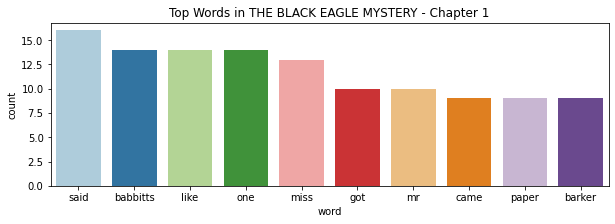

Text(0.5, 1.0, 'Top Words in THE BLACK EAGLE MYSTERY - Chapter 1')

In [0]:
## Chart it
source = "THE BLACK EAGLE MYSTERY - Chapter 1"
title = "Top Words in " + source
xlabel = 'word'
ylabel = 'count'

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame.from_records(results, columns =[ylabel, xlabel])
plt.figure(figsize=(10,3))
sns.barplot(xlabel, ylabel, data=df, palette="Paired").set_title(title)